# Principal Component Analysis (PCA)

PCA is an unsupervised technique that processes unlabelled data to restructure the columns of a dataframe. The primary use of PCA is dimensionality reduction, which reduces the number of columns while trying to lose as little detail as possible. This streamlining of data has a notable secondary effect: it can reduce noise. Noise in data refers to random variations that obscure underlying patterns or signals, making it harder to extract meaningful information.

In this project, we don't have many columns, so dimensionality reduction isn't a major concern. However, this technique will be particularly useful in our next project, supervised machine learning. For now, you'll find that the noise reduction achieved through PCA helps to create better clusters, demonstrating why PCA is such a valuable unsupervised learning tool.

---
##1.&nbsp; Import libraries and files 💾

In [90]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import set_config
set_config(transform_output="pandas")

---
##4.&nbsp; Challenge: apply this to the spotify dataset 😃
Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.

DataFrame reinladen!

In [48]:
song_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
id,,,,,,,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
5QGM1U0eCYrQuwSJwTm5Zq,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
0NLIFSZxPzQhCwnkn5PJYs,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3mXqOdlLE1k67WsAxryPFs,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
7bSzjzjTkWT2CkIPPdp0eA,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
1Gfqe7TAKklmuZf6hxsH6h,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
2XNwnFrdMDpismp0VUZ7cU,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


In [170]:
url = '/Users/saida/Desktop/Bootcamp/unsupervised machine learning/3_spotify_5000_songs.csv'

# Create a Pandas DataFrame from the CSV data
song_df = pd.read_csv(url)#,index_col="id ")
song_df.columns = song_df.columns.str.strip()
song_df = song_df.set_index("id", drop=False)
song_df=song_df.drop_duplicates(subset='id')
audio_df=song_df.iloc[:,3:-2]
audio_df=audio_df.drop(columns='type')
#audio_df=audio_df.drop_duplicates()
#audio_df.duplicated().sum()
audio_df=audio_df.drop(columns=['duration_ms','mode' ])
audio_df=audio_df.iloc[:,:-4]
audio_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness
id,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.6580,0.25900,11,-13.141,0.0705,0.694,0.000059
5QGM1U0eCYrQuwSJwTm5Zq,0.7420,0.39900,2,-12.646,0.0346,0.217,0.000002
0NLIFSZxPzQhCwnkn5PJYs,0.8510,0.73000,2,-11.048,0.3470,0.453,0.000063
3mXqOdlLE1k67WsAxryPFs,0.7050,0.05020,4,-18.115,0.0471,0.879,0.000041
7bSzjzjTkWT2CkIPPdp0eA,0.6510,0.11900,6,-19.807,0.0380,0.916,0.000343
...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.2020,0.06940,3,-23.390,0.0473,0.917,0.715000
1Gfqe7TAKklmuZf6hxsH6h,0.1880,0.10100,6,-21.873,0.0442,0.855,0.426000
2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,9,-42.959,0.0434,0.951,0.969000


danach die datan skalieren!

In [172]:
# Initialise the transformer (optionally, set parameters)
#scaler = MinMaxScaler()
#scaler = PowerTransformer()
scaler= RobustScaler()
# Use the transformer to transform the data
scaled_audio_df = scaler.fit_transform(audio_df)

In [181]:
# Initialise the PCA object
pca = PCA(n_components=5)

# Fit the PCA object to the data
d=pca.fit(scaled_audio_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_audio_df)

pca_basic_df

,pca0,pca1,pca2,pca3,pca4
id,,,,,
1n7JnwviZ7zf0LR1tcGFq7,-0.987638,0.289435,1.001254,0.978089,0.110703
5QGM1U0eCYrQuwSJwTm5Zq,-0.860258,-0.491282,0.696542,-0.524065,-0.565561
0NLIFSZxPzQhCwnkn5PJYs,2.405395,3.566415,1.284612,-0.607732,-0.335314
3mXqOdlLE1k67WsAxryPFs,-2.027092,0.465573,1.286200,-0.168842,-0.082312
7bSzjzjTkWT2CkIPPdp0eA,-2.250227,0.468021,1.115835,0.169791,-0.141726
...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,-2.887383,1.238910,-0.233116,-0.326317,0.137884
1Gfqe7TAKklmuZf6hxsH6h,-2.621497,0.982150,-0.062569,0.174648,0.239158
2XNwnFrdMDpismp0VUZ7cU,-5.085158,2.804142,-0.825333,0.708582,-1.272925


Identifying the most informative Principal Components

In [177]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.470086
1,0.260737
2,0.112054
3,0.081073
4,0.034252


Identifying using the Elbow Method

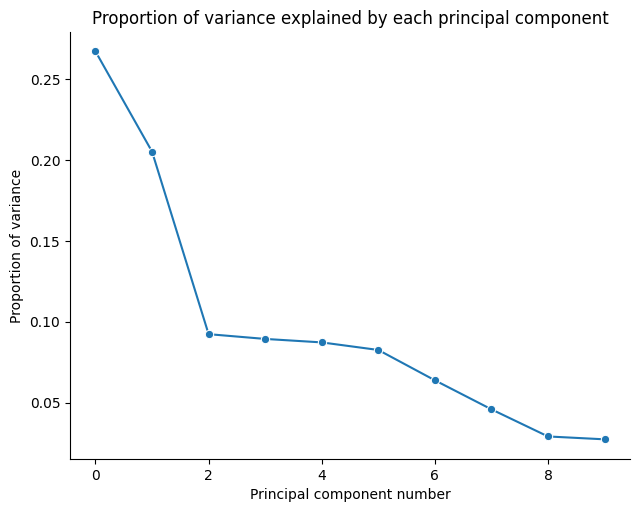

In [94]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly

In [66]:
elbow = 7

In [67]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_audio_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
id,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,-1.015950,1.028588,1.244995,1.727774,1.847380,0.072436,1.060883,-0.646243
5QGM1U0eCYrQuwSJwTm5Zq,-0.526933,2.141448,-0.813857,-0.402646,-0.148523,0.381520,-0.145749,0.219573
0NLIFSZxPzQhCwnkn5PJYs,0.747908,1.717571,0.220291,-1.177103,0.209167,-1.181304,2.220089,0.534206
3mXqOdlLE1k67WsAxryPFs,-1.591671,2.033454,-0.051513,0.580721,1.835366,0.048185,0.807171,-0.114195
7bSzjzjTkWT2CkIPPdp0eA,-2.043473,1.996369,0.220726,0.315739,-0.219105,0.585019,0.393484,-0.513362
...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,-3.921696,-0.616779,0.292940,-1.086826,-0.066627,0.150601,0.147054,-0.198671
1Gfqe7TAKklmuZf6hxsH6h,-3.858737,-0.552916,1.001970,-0.717373,-0.414266,0.077717,-0.146073,-0.515772
2XNwnFrdMDpismp0VUZ7cU,-5.229022,-1.202000,0.725393,0.824059,-0.952326,-1.585858,-0.045002,0.125693


Cumulative explained variance:



Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [178]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.47008568, 0.73082251, 0.84287614, 0.92394935, 0.95820154])

In [179]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

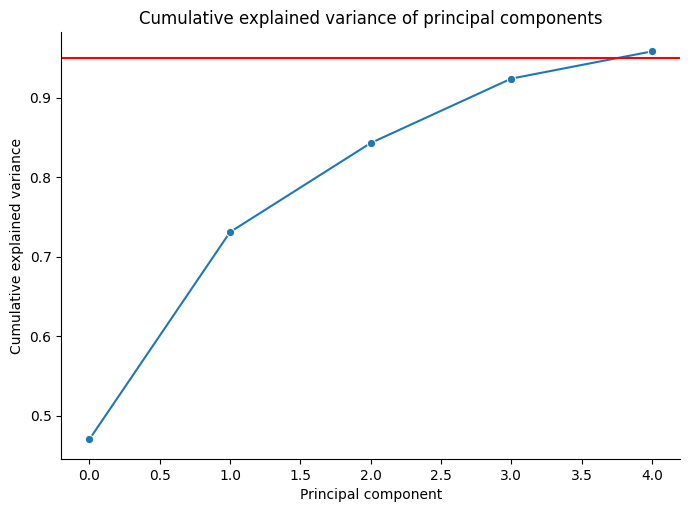

In [180]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [182]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_audio_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,pca0,pca1,pca2,pca3,pca4
id,,,,,
1n7JnwviZ7zf0LR1tcGFq7,-0.987638,0.289435,1.001254,0.978089,0.110703
5QGM1U0eCYrQuwSJwTm5Zq,-0.860258,-0.491282,0.696542,-0.524065,-0.565561
0NLIFSZxPzQhCwnkn5PJYs,2.405395,3.566415,1.284612,-0.607732,-0.335314
3mXqOdlLE1k67WsAxryPFs,-2.027092,0.465573,1.286200,-0.168842,-0.082312
7bSzjzjTkWT2CkIPPdp0eA,-2.250227,0.468021,1.115835,0.169791,-0.141726
...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,-2.887383,1.238910,-0.233116,-0.326317,0.137884
1Gfqe7TAKklmuZf6hxsH6h,-2.621497,0.982150,-0.062569,0.174648,0.239158
2XNwnFrdMDpismp0VUZ7cU,-5.085158,2.804142,-0.825333,0.708582,-1.272925


In [101]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

9


In [250]:
kmeans = KMeans(n_clusters=40, random_state=42, n_init=10)

kmeans.fit(pca_basic_df)
labels = kmeans.fit_predict(pca_basic_df)

song_df["cluster"] = labels



Elbow methode für die Anzahl an Clustern

In [184]:

# Create an empty list to store the silhouette scores
sil_scores = []
max_k=100
for k in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = k,
                    random_state = 42)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_basic_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    sil_score = silhouette_score(pca_basic_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(sil_score)

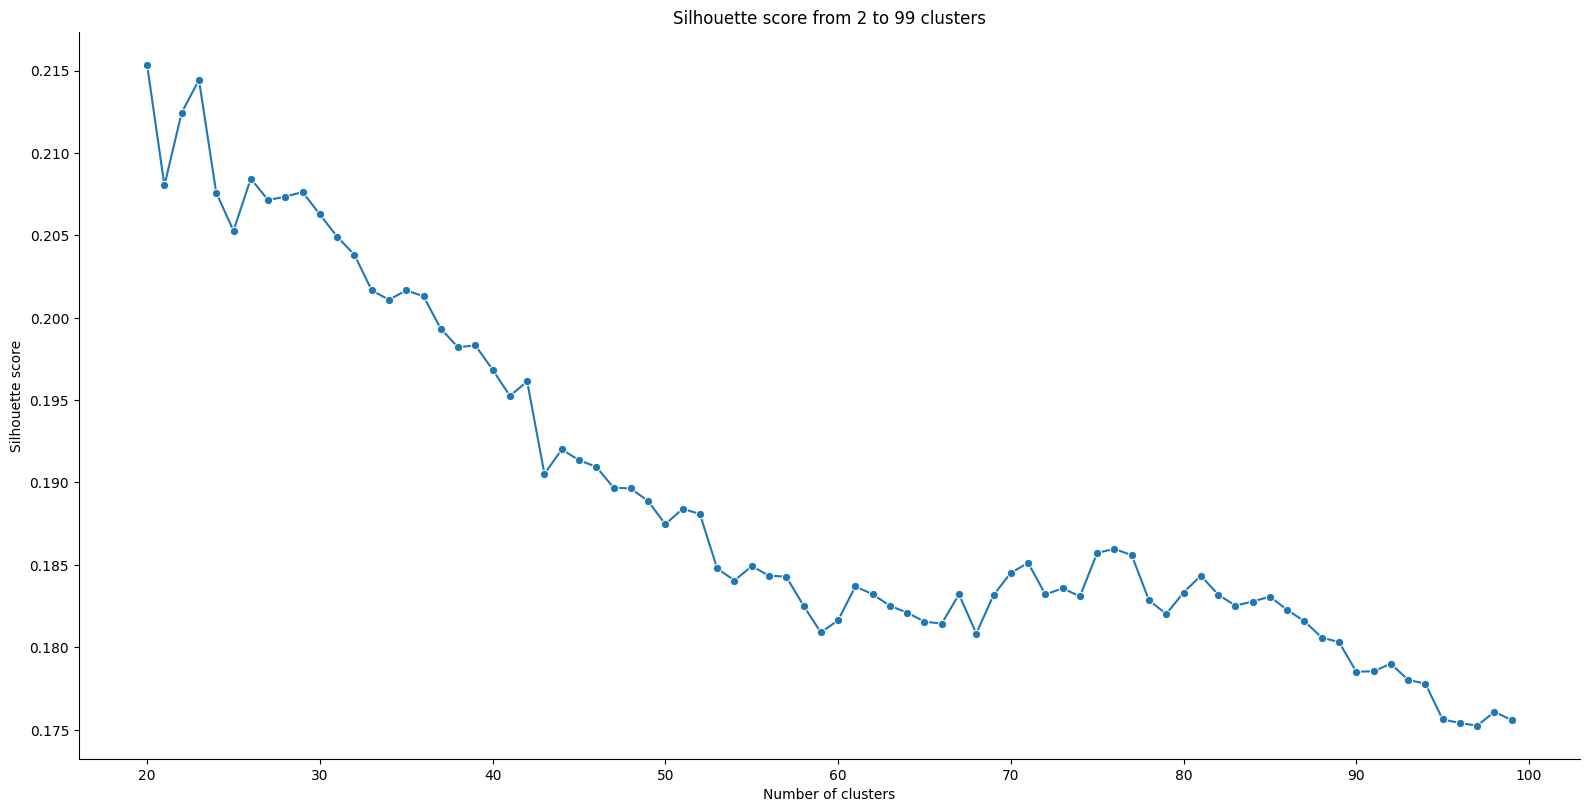

In [185]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);